✅ Data Summary:
Total Cat Images: 5
Total Dog Images: 4
Total Images: 9
Shape of each image vector: (4096,)
Labels (0 = Cat, 1 = Dog): [0 0 0 0 0 1 1 1 1]

✅ Predictions vs Actual:
Image 1: Actual: Cat, Predicted: Cat
Image 2: Actual: Cat, Predicted: Cat
Image 3: Actual: Cat, Predicted: Cat
Image 4: Actual: Cat, Predicted: Cat
Image 5: Actual: Cat, Predicted: Cat
Image 6: Actual: Dog, Predicted: Dog
Image 7: Actual: Dog, Predicted: Dog
Image 8: Actual: Dog, Predicted: Dog
Image 9: Actual: Dog, Predicted: Dog


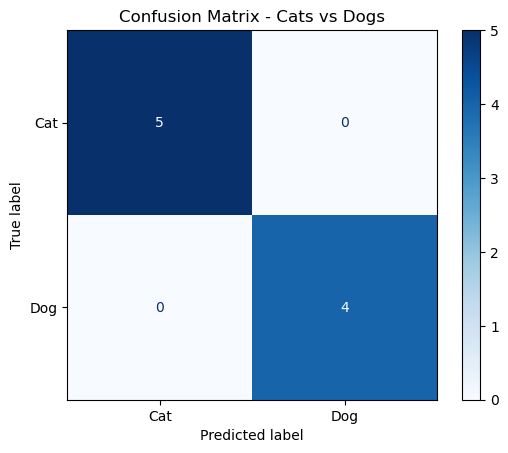

In [1]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from PIL import Image
import joblib

# Function to load and process images
def load_images_from_folder(folder, label, image_size=(64, 64)):
    data = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path).convert('L')  # grayscale
            img = img.resize(image_size)
            img_array = np.array(img).flatten()
            data.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Skipped {filename}: {e}")
    return data, labels

# ✅ Update with correct absolute paths
cat_dir = "C:/Users/Admin/Documents/dataset/cats"
dog_dir = "C:/Users/Admin/Documents/dataset/dogs"

# Load images
cat_data, cat_labels = load_images_from_folder(cat_dir, label=0)
dog_data, dog_labels = load_images_from_folder(dog_dir, label=1)

# Combine data and labels
X = np.array(cat_data + dog_data)
y = np.array(cat_labels + dog_labels)

# 💡 Print summary before training
print("✅ Data Summary:")
print(f"Total Cat Images: {len(cat_data)}")
print(f"Total Dog Images: {len(dog_data)}")
print(f"Total Images: {len(X)}")
print("Shape of each image vector:", X[0].shape)
print("Labels (0 = Cat, 1 = Dog):", y)

# Train SVM model
model = SVC(kernel='linear', probability=True)
model.fit(X, y)

# Save model
joblib.dump(model, "svc_model.pkl")

# Load and predict
model = joblib.load("svc_model.pkl")
y_pred = model.predict(X)

# 💡 Print prediction results
print("\n✅ Predictions vs Actual:")
for i in range(len(y)):
    print(f"Image {i+1}: Actual: {'Cat' if y[i]==0 else 'Dog'}, Predicted: {'Cat' if y_pred[i]==0 else 'Dog'}")

# Plot confusion matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Cats vs Dogs")
plt.show()
